#### 'winequality-red.csv' -> 와인에 대한 정보와(x), 품질(y)이 나와있는 데이터 셋입니다. 

### Q1. 'quality'라는 변수에서 일정한 기준을 잡아 와인의 quality를 'Good'과 'Bad'로 나누어 보세요. (ex) quality가 x이상이면 'good', x미만이면 'bad')

### Q2. 데이터를 훈련세트와 테스트 세트로 분리하여, DecisionTree 모델로 학습시켜보세요.

### Q3. RandomForest 모델을 학습해보면서, GridSearch를 이용해 BestParameter를 찾아보세요.

### Q4. Voting과 Bagging의 차이점을 간략하게 적어주세요.

## Q1.  'quality'라는 변수에서 일정한 기준을 잡아 와인의 quality를 'Good'과 'Bad'로 나누어 보세요. (ex) quality가 x이상이면 'good', x미만이면 'bad')

In [12]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib in line

UsageError: unrecognized arguments: line


In [13]:
raw_data = pd.read_csv('winequality-red.csv')
raw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [14]:
wine_quality = raw_data['quality']

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

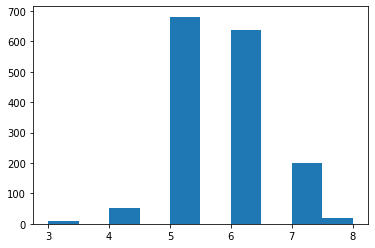

In [15]:
plt.hist(wine_quality)

In [16]:
def get_rate(quality):
    cat=''
    
    if quality<=5:
        cat='Bad'
    else : 
        cat='Good'
    
    return cat

raw_data['rate'] = raw_data['quality'].apply(lambda x:get_rate(x))
raw_data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rate
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad


## Q2. 데이터를 훈련세트와 테스트 세트로 분리하여, DecisionTree 모델로 학습시켜보세요.

In [29]:
features = raw_data.iloc[:, :-2]
labels = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,random_state=121)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1119 480 1119 480


In [30]:
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=121)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,dt_pred)

print('모델 정확도 = {0:.5f}'.format(accuracy))

모델 정확도 = 0.75417


In [31]:
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 121, 'splitter': 'best'}


## Q3. RandomForest 모델을 학습해보면서, GridSearch를 이용해 BestParameter를 찾아보세요.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [10,50,100],
    'max_depth' : [4,6,8,10,12],
    'min_samples_leaf' : [2,4,8,12,18],
    'min_samples_split' : [4,8,16,20],
    'max_features' : [2,4,6,8]
}

rf_clf=RandomForestClassifier(random_state=121,n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적의 하이퍼 파라미터:',grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼 파라미터: {'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}
최고 예측 정확도: 0.7739


## Q4. Voting과 Bagging의 차이점을 간략하게 적어주세요.

Voting은 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, Bagging의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 Voting을 수행하는 것이다.